In [1]:
import pandas as pd
import datetime
from dateutil import relativedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import math

## read data

In [2]:
train = pd.read_csv("./data/train-v3.csv")
valid = pd.read_csv("./data/valid-v3.csv")
test = pd.read_csv("./data/test-v3.csv")
print('data num => train: {}, valid: {}, test: {}'.format(len(train),len(valid),len(test)))

data num => train: 12967, valid: 2161, test: 6485


In [3]:
train.sort_values("id").head(5)

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
117,1000102,300000,2015,4,22,6,3.00,2400,9373,2,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
101,1000102,280000,2014,9,16,6,3.00,2400,9373,2,...,7,2400,0,1991,0,98002,47.3262,-122.214,2060,7316
11235,1200021,400000,2014,8,11,3,1.00,1460,43000,1,...,7,1460,0,1952,0,98166,47.4434,-122.347,2250,20023
3298,2800031,235000,2015,4,1,3,1.00,1430,7599,1,...,6,1010,420,1930,0,98168,47.4783,-122.265,1290,10320
642,3600072,680000,2015,3,30,4,2.75,2220,5310,1,...,7,1170,1050,1951,0,98144,47.5801,-122.294,1540,4200


## check train data info

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12967 entries, 0 to 12966
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             12967 non-null  int64  
 1   price          12967 non-null  int64  
 2   sale_yr        12967 non-null  int64  
 3   sale_month     12967 non-null  int64  
 4   sale_day       12967 non-null  int64  
 5   bedrooms       12967 non-null  int64  
 6   bathrooms      12967 non-null  float64
 7   sqft_living    12967 non-null  int64  
 8   sqft_lot       12967 non-null  int64  
 9   floors         12967 non-null  int64  
 10  waterfront     12967 non-null  int64  
 11  view           12967 non-null  int64  
 12  condition      12967 non-null  int64  
 13  grade          12967 non-null  int64  
 14  sqft_above     12967 non-null  int64  
 15  sqft_basement  12967 non-null  int64  
 16  yr_built       12967 non-null  int64  
 17  yr_renovated   12967 non-null  int64  
 18  zipcod

In [5]:
train.describe(include=['int64','float64'])

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.296700e+04,1.296700e+04,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,1.296700e+04,12967.000000,...,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000,12967.000000
mean,4.588968e+09,5.373833e+05,2014.322511,6.572068,15.729930,3.362381,2.106058,2071.295057,1.499539e+04,1.442893,...,7.646025,1781.741806,289.553251,1970.766947,82.948870,98078.459166,47.558910,-122.214565,1980.143672,12796.538290
std,2.877996e+09,3.668840e+05,0.467455,3.107792,8.619505,0.941124,0.765280,919.355180,3.875191e+04,0.551628,...,1.171189,826.580915,440.742634,29.472777,398.333729,53.525055,0.138978,0.140481,683.572323,27429.856166
min,1.000102e+06,7.500000e+04,2014.000000,1.000000,1.000000,0.000000,0.000000,290.000000,5.720000e+02,1.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.159300,-122.515000,399.000000,659.000000
25%,2.134110e+09,3.199500e+05,2014.000000,4.000000,8.000000,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470450,-122.330000,1480.000000,5100.000000
50%,3.905000e+09,4.470000e+05,2014.000000,6.000000,16.000000,3.000000,2.250000,1900.000000,7.620000e+03,1.000000,...,7.000000,1550.000000,0.000000,1974.000000,0.000000,98065.000000,47.569900,-122.232000,1830.000000,7625.000000
75%,7.326850e+09,6.370000e+05,2015.000000,9.000000,23.000000,4.000000,2.500000,2540.000000,1.063400e+04,2.000000,...,8.000000,2200.000000,560.000000,1996.000000,0.000000,98118.000000,47.677300,-122.125000,2350.000000,10051.000000
max,9.900000e+09,7.062500e+06,2015.000000,12.000000,31.000000,33.000000,8.000000,13540.000000,1.024068e+06,3.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## price distribution

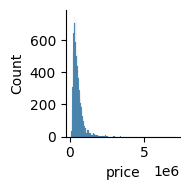

In [6]:
sns.displot(train['price'],height=2, aspect=1)

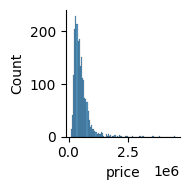

In [7]:
sns.displot(valid['price'],height=2, aspect=1)

## log(price) to get normal distribution

<AxesSubplot: >

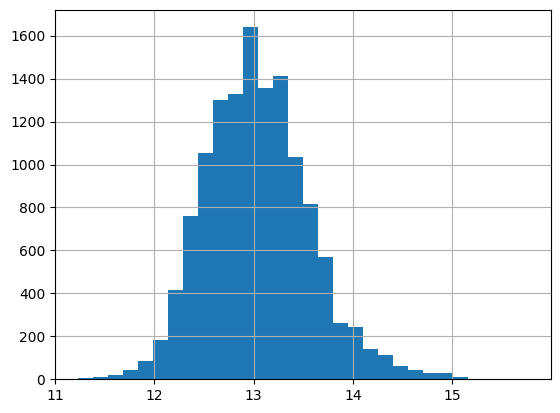

In [8]:
train['price'].apply(lambda x: np.log1p(x)).hist(bins=30)

In [9]:
train['price'] = train['price'].apply(lambda x: np.log1p(x))
valid['price'] = valid['price'].apply(lambda x: np.log1p(x))

## turn renovated as 0/1 

In [10]:
print((train['yr_renovated'] != 0).sum())
print((valid['yr_renovated'] != 0).sum())
print((test['yr_renovated'] != 0).sum())

539
96
279


In [11]:
def renovate(df): 
    if 'yr_renovated' in df.columns:
        df['renovated'] = df['yr_renovated'].astype(bool).astype(int)
        df = df.drop(['yr_renovated'],axis=1)
    return df

train = renovate(train)
valid = renovate(valid)
test = renovate(test)

train.describe(include=['int32'])
train['renovated'].corr(train['price'])

0.11188978106327019

## transfer lat & long 

In [12]:
def latlong_dist(long1, lat1, long2, lat2):
    # radians() for long1, lat1, long2, lat2     
    long1, lat1, long2, lat2 = map(math.radians, [long1, lat1, long2, lat2]) 
    diff_long = long2 - long1 
    diff_lat = lat2 - lat1 
    a = math.sin(diff_lat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(diff_long/2)**2 
    c = 2 * math.asin(math.sqrt(a)) 
    # const r     
    r = 6371 
    return c * r

In [13]:
# mean long and lat
# FIXED_LONG = -122.214565
# FIXED_LAT = 47.558910

def longlat_transform(df):
    FIXED_LONG = df['long'].mean()
    FIXED_LAT = df['lat'].mean()
    df['distance'] = df.apply(lambda row: latlong_dist(FIXED_LONG, FIXED_LAT, row['long'], row['lat']), axis=1)
    df['greater_long'] = (df['long'] >= FIXED_LONG).astype(int)
    df['less_long'] = (df['long'] < FIXED_LONG).astype(int)
    df['greater_lat'] = (df['lat'] >= FIXED_LAT).astype(int)
    df['less_lat'] = (df['lat'] < FIXED_LAT).astype(int)
    return df

train = longlat_transform(train)
valid = longlat_transform(valid)
test = longlat_transform(test)

In [14]:
train.head(2)

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,lat,long,sqft_living15,sqft_lot15,renovated,distance,greater_long,less_long,greater_lat,less_lat
0,5615100330,12.206078,2015,3,27,4,2.0,1900,8160,1,...,47.2114,-121.986,1280,6532,0,42.299614,1,0,0,1
1,8835900086,12.765691,2014,9,2,4,3.0,3380,16133,1,...,47.5501,-122.261,2500,11100,0,3.619772,0,1,0,1


## calculate date duration between build-to-sale

In [15]:
# 整合sale_yr, sale_month, sale_day，改成sale_date(Datetime)
def combine_saleDate(df):
    if set(['sale_yr', 'sale_month', 'sale_day']).issubset(df.columns):
        df['sale_date'] = datetime.date.today()
        for idx, row in df.iterrows():
            saleDate_str = (str(row['sale_yr'])+'-'+str(row['sale_month'])+'-'+str(row['sale_day']))
            saleDate = datetime.datetime.strptime(saleDate_str, '%Y-%m-%d')
            df.at[idx,'sale_date'] = saleDate
        df = df.drop(['sale_yr', 'sale_month', 'sale_day'], axis=1)
    return df

# 算建造日期到銷售日期的時間，built-to-sale(int)
def build_to_sale(df):   
    if 'yr_built' in df.columns:
        df['built2sale_day'], df['built2sale_year'] = 0, 0
        for idx, row in df.iterrows():
            builtDate_str = (str(row['yr_built'])+'-06-15')
            builtDate = datetime.datetime.strptime(builtDate_str, '%Y-%m-%d')
            df.at[idx,'built2sale_day'] = (row['sale_date']-builtDate).days
            df.at[idx,'built2sale_year'] = relativedelta.relativedelta(row['sale_date'], builtDate).years
        df = df.drop(['yr_built','sale_date'], axis=1)
    return df


train = build_to_sale(combine_saleDate(train))
valid = build_to_sale(combine_saleDate(valid))
test = build_to_sale(combine_saleDate(test))

train.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,renovated,distance,greater_long,less_long,greater_lat,less_lat,built2sale_day,built2sale_year
0,5615100330,12.206078,4,2.0,1900,8160,1,0,0,3,...,1280,6532,0,42.299614,1,0,0,1,14530,39
1,8835900086,12.765691,4,3.0,3380,16133,1,0,1,3,...,2500,11100,0,3.619772,0,1,0,1,20168,55
2,9510900270,12.445093,3,2.0,2070,9000,1,0,0,4,...,1630,7885,0,30.376785,0,1,0,1,16615,45
3,2621600015,12.072547,3,1.0,1150,8924,1,0,0,3,...,1492,8924,0,19.171979,0,1,0,1,26252,71
4,8078350090,13.335862,3,2.5,2040,7503,2,0,0,3,...,2170,7503,0,14.593454,1,0,1,0,10151,27


## correlation ( feature/price )

<AxesSubplot: >

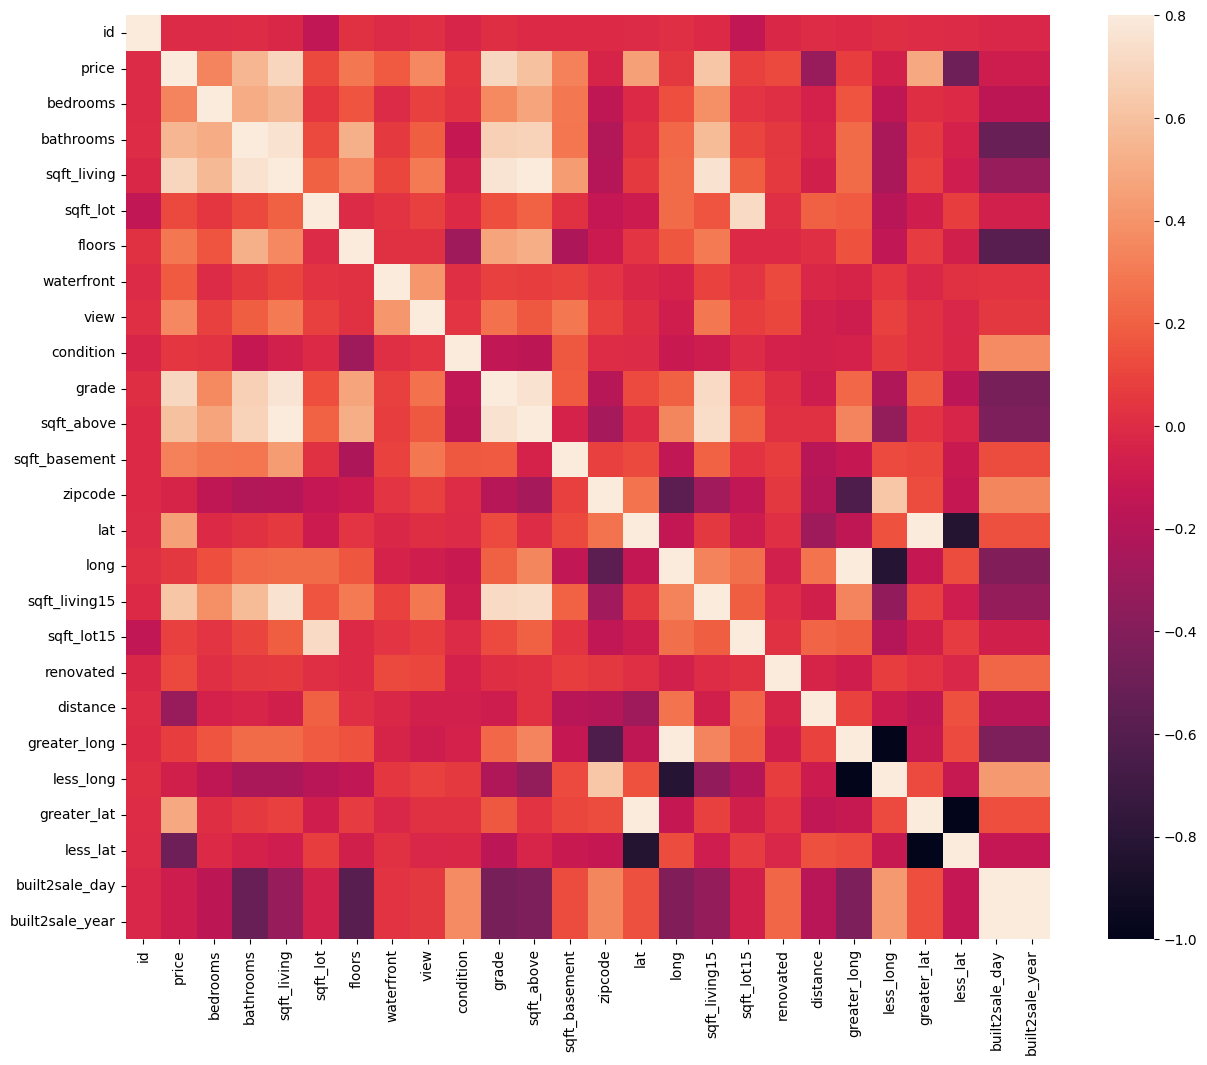

In [16]:
f, ax = plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(), vmax=0.8, square=True)

In [17]:
col_list = [e for e in list(train.columns) if e not in ('id','price')]
highCorr_feature = []
for col in col_list:
    corr = train[col].corr(train['price'])
    print('{} : {}'.format(col,corr))
    if abs(corr)>0.00:
        highCorr_feature.append(col)
    # plot correlation     
    plot = sns.scatterplot(x=col, y="price", data=train).get_figure()
    plot.savefig('./corr_fig/'+str(col)+'_corr='+str(corr)[:6]+'.png') 
    plot.get_figure().clf()

bedrooms : 0.33728567203124576
bathrooms : 0.5528389972501467
sqft_living : 0.6959227905351341
sqft_lot : 0.11212114637652988
floors : 0.2909979348643644
waterfront : 0.1759041146494972
view : 0.353309553239403
condition : 0.04521961601376584
grade : 0.7079224489449908
sqft_above : 0.5995859429854247
sqft_basement : 0.32716128203462547
zipcode : -0.04122623121454919
lat : 0.4490487312358928
long : 0.05081786424542292
sqft_living15 : 0.6212117978078594
sqft_lot15 : 0.08766780234932377
renovated : 0.11188978106327019
distance : -0.31285218783263335
greater_long : 0.07099824124319508
less_long : -0.07099824124319508
greater_lat : 0.48799309782321415
less_lat : -0.4879930978232133
built2sale_day : -0.08717981966563229
built2sale_year : -0.08734516864556276


<Figure size 640x480 with 0 Axes>

In [18]:
train.corr().loc['price'].sort_values(ascending=False)

price              1.000000
grade              0.707922
sqft_living        0.695923
sqft_living15      0.621212
sqft_above         0.599586
bathrooms          0.552839
greater_lat        0.487993
lat                0.449049
view               0.353310
bedrooms           0.337286
sqft_basement      0.327161
floors             0.290998
waterfront         0.175904
sqft_lot           0.112121
renovated          0.111890
sqft_lot15         0.087668
greater_long       0.070998
long               0.050818
condition          0.045220
id                -0.003914
zipcode           -0.041226
less_long         -0.070998
built2sale_day    -0.087180
built2sale_year   -0.087345
distance          -0.312852
less_lat          -0.487993
Name: price, dtype: float64

for col in col_list:
    # plot distribution     
    plot = sns.displot(train[col])
    plt.savefig('./dist_fig/'+col+'.png')
    plt.clf()

In [19]:
train = train[['id','price']+highCorr_feature]
valid = valid[['id','price']+highCorr_feature]
test = test[['id']+highCorr_feature]

train.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,renovated,distance,greater_long,less_long,greater_lat,less_lat,built2sale_day,built2sale_year
0,5615100330,12.206078,4,2.0,1900,8160,1,0,0,3,...,1280,6532,0,42.299614,1,0,0,1,14530,39
1,8835900086,12.765691,4,3.0,3380,16133,1,0,1,3,...,2500,11100,0,3.619772,0,1,0,1,20168,55
2,9510900270,12.445093,3,2.0,2070,9000,1,0,0,4,...,1630,7885,0,30.376785,0,1,0,1,16615,45


## normalize high_Corrfeature

In [20]:
norm_col = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'distance', 'built2sale_day',
       'built2sale_year']
normalize = StandardScaler().fit_transform

def norm_df(df):
    normalize_df = df.copy()
    normalize_df[norm_col] = normalize(df[norm_col])
    return normalize_df

normalized_train = norm_df(train)
normalized_valid = norm_df(valid)
normalized_test = norm_df(test)

In [21]:
normalized_train.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,renovated,distance,greater_long,less_long,greater_lat,less_lat,built2sale_day,built2sale_year
count,1.296700e+04,12967.000000,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04,...,1.296700e+04,1.296700e+04,1.296700e+04,1.296700e+04,12967.000000,12967.000000,12967.000000,12967.000000,1.296700e+04,1.296700e+04
mean,4.588968e+09,13.041052,-7.150908e-17,1.731561e-16,8.109842e-17,-1.972664e-17,3.726144e-17,1.972664e-17,4.383699e-18,-2.849404e-16,...,-4.904263e-17,7.671472e-18,-7.671472e-18,2.871323e-16,0.463561,0.536439,0.533431,0.466569,6.575548e-17,-9.233165e-17
std,2.877996e+09,0.529147,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,...,1.000039e+00,1.000039e+00,1.000039e+00,1.000039e+00,0.498690,0.498690,0.498900,0.498900,1.000039e+00,1.000039e+00
min,1.000102e+06,11.225257,-3.572868e+00,-2.752116e+00,-1.937623e+00,-3.722125e-01,-8.029160e-01,-8.991777e-02,-3.044149e-01,-3.702965e+00,...,-2.313149e+00,-4.425108e-01,-2.082542e-01,-2.109184e+00,0.000000,0.000000,0.000000,0.000000,-1.515657e+00,-1.496921e+00
25%,2.134110e+09,12.675923,-3.850666e-01,-7.919730e-01,-7.084533e-01,-2.569105e-01,-8.029160e-01,-8.991777e-02,-3.044149e-01,-6.377658e-01,...,-7.316899e-01,-2.806006e-01,-2.082542e-01,-6.932885e-01,0.000000,0.000000,0.000000,0.000000,-8.703459e-01,-8.860976e-01
50%,3.905000e+09,13.010316,-3.850666e-01,1.880983e-01,-1.863281e-01,-1.903306e-01,-8.029160e-01,-8.991777e-02,-3.044149e-01,-6.377658e-01,...,-2.196541e-01,-1.885441e-01,-2.082542e-01,-8.620881e-02,0.000000,1.000000,1.000000,0.000000,-1.236053e-01,-1.395358e-01
75%,7.326850e+09,13.364527,6.775337e-01,5.147888e-01,5.098389e-01,-1.125507e-01,1.009971e+00,-8.991777e-02,-3.044149e-01,8.948341e-01,...,5.410848e-01,-1.000969e-01,-2.082542e-01,6.468976e-01,1.000000,1.000000,1.000000,1.000000,6.631218e-01,6.748953e-01
max,9.900000e+09,15.770310,3.149294e+01,7.701979e+00,1.247521e+01,2.604031e+01,2.822858e+00,1.112127e+01,4.894595e+00,2.427434e+00,...,6.188108e+00,3.129570e+01,4.801824e+00,6.606794e+00,1.000000,1.000000,1.000000,1.000000,2.418907e+00,2.405561e+00


In [22]:
normalized_train.head(3)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_living15,sqft_lot15,renovated,distance,greater_long,less_long,greater_lat,less_lat,built2sale_day,built2sale_year
0,5615100330,12.206078,0.677534,-0.138592,-0.186328,-0.176395,-0.802916,-0.089918,-0.304415,-0.637766,...,-1.024282,-0.228393,-0.208254,3.188518,1,0,0,1,-0.129736,-0.139536
1,8835900086,12.765691,0.677534,1.168170,1.423558,0.029357,-0.802916,-0.089918,0.995338,-0.637766,...,0.760529,-0.061852,-0.208254,-1.672842,0,1,0,1,0.393944,0.403418
2,9510900270,12.445093,-0.385067,-0.138592,-0.001409,-0.154718,-0.802916,-0.089918,-0.304415,0.894834,...,-0.512246,-0.179065,-0.208254,1.690033,0,1,0,1,0.063927,0.064072


## zip code get_dummy 

In [23]:
def zip_dummy(df):
    df = df.join(pd.get_dummies(df.zipcode,prefix='zip_'))
    return df

In [24]:
final_train = zip_dummy(normalized_train)
final_valid = zip_dummy(normalized_valid)
final_test = zip_dummy(normalized_test)

In [25]:
final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12967 entries, 0 to 12966
Data columns (total 96 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               12967 non-null  int64  
 1   price            12967 non-null  float64
 2   bedrooms         12967 non-null  float64
 3   bathrooms        12967 non-null  float64
 4   sqft_living      12967 non-null  float64
 5   sqft_lot         12967 non-null  float64
 6   floors           12967 non-null  float64
 7   waterfront       12967 non-null  float64
 8   view             12967 non-null  float64
 9   condition        12967 non-null  float64
 10  grade            12967 non-null  float64
 11  sqft_above       12967 non-null  float64
 12  sqft_basement    12967 non-null  float64
 13  zipcode          12967 non-null  int64  
 14  lat              12967 non-null  float64
 15  long             12967 non-null  float64
 16  sqft_living15    12967 non-null  float64
 17  sqft_lot15  

## zipcode embed

In [26]:
final_train['zipcode'] = final_train['zipcode']-min(final_train['zipcode'])+1
final_valid['zipcode'] = final_valid['zipcode']-min(final_valid['zipcode'])+1
final_test['zipcode'] = final_test['zipcode']-min(final_test['zipcode'])+1

In [27]:
final_train.to_csv('./processed_data/train.csv', index=False)
final_valid.to_csv('./processed_data/valid.csv', index=False)
final_test.to_csv('./processed_data/test.csv', index=False)

In [28]:
print("zipcode" in final_train.columns)

True
